In [1]:
import numpy as np

In [8]:
n = 10
np.random.randint(1, n + 1, size=n)

array([ 2, 10,  6,  2, 10, 10,  9, 10, 10,  5])

In [9]:
1. - 1. / np.e

0.6321205588285577

### Титаник

In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

In [78]:
df = pd.read_csv('./Downloads/train.csv')
df.head(5)
y = df['Survived'].values
del df['Survived']
df['Age'].fillna(df['Age'].mean(), inplace=True)
feature_names = ['Sex', 'Age', 'SibSp', 'Pclass', 'Parch', 'Fare']
df = df[feature_names]
df['Sex'] = (df['Sex'] == 'male').astype(int)
X_train, X_test, y_train, y_test = train_test_split(df, y)

In [31]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print('ROC-AUC:', roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1]))
print('Accuracy:', accuracy_score(y_test, tree.predict(X_test)))

ROC-AUC: 0.733506514927
Accuracy: 0.748878923767


In [55]:
tree_params = {'max_depth': np.arange(1, 50),
              'criterion': ['gini', 'entropy']}
gs_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, scoring='roc_auc')
gs_tree.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [56]:
gs_tree.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [57]:
print('ROC-AUC for optimized tree:',
      roc_auc_score(y_test, gs_tree.best_estimator_.predict_proba(X_test)[:, 1]))

ROC-AUC for optimized tree: 0.870897245588


In [58]:
gs_tree.cv_results_.keys()
score =  np.array(gs_tree.cv_results_['mean_test_score'])
crit = np.array(gs_tree.cv_results_['param_criterion'])
depth = np.array(gs_tree.cv_results_['param_max_depth'])

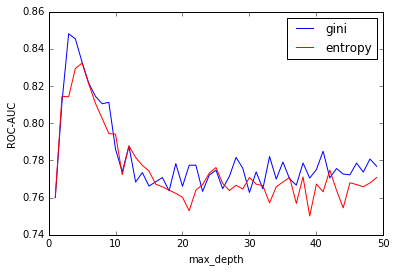

In [59]:
idx = crit == 'gini'
plt.plot(depth[idx], score[idx], c='b')
idx = crit == 'entropy'
plt.plot(depth[idx], score[idx], c='r')
plt.legend(['gini', 'entropy'])
plt.xlabel('max_depth')
plt.ylabel('ROC-AUC')

##### Random Forest for Titanic

In [64]:
rf = RandomForestClassifier(n_estimators=2000, n_jobs=-1)
rf.fit(X_train, y_train)
print('ROC-AUC:', roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))
print('Accuracy:', accuracy_score(y_test, rf.predict(X_test)))

ROC-AUC: 0.852424542306
Accuracy: 0.789237668161


In [67]:
del X_train['Parch']
del X_test['Parch']

In [71]:
del X_train['SibSp']
del X_test['SibSp']

In [72]:
rf = RandomForestClassifier(n_estimators=2000, n_jobs=-1)
rf.fit(X_train, y_train)
print('ROC-AUC:', roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))
print('Accuracy:', accuracy_score(y_test, rf.predict(X_test)))

ROC-AUC: 0.845043707735
Accuracy: 0.798206278027


In [75]:
X_train = np.hstack((X_train, y_train[:, np.newaxis]))
X_test = np.hstack((X_test, y_test[:, np.newaxis]))

In [80]:
rf = RandomForestClassifier(n_estimators=2000, n_jobs=-1, oob_score=True
                           )
rf.fit(X_train, y_train)
print('ROC-AUC:', roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))
print('Accuracy:', accuracy_score(y_test, rf.predict(X_test)))

ROC-AUC: 0.864135864136
Accuracy: 0.834080717489


In [83]:
rf.oob_score_

0.81287425149700598